# PRÁCTICO N° 3 : Bases de Datos #
## Tapia Martina ##
## Actividad 3 ##

En esta actividad lo que se busca es graficar las magnitudes aparentes de galaxias en la banda r en función de las magnitudes en la banda g, y obtener un ajuste para la relación entre ambas.

In [1]:
#Primero se importan las librerías necesarias para trabajar
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import seaborn as sns          
sns.set()         
from scipy.stats import poisson

In [2]:
data = np.genfromtxt('muestra1_MartinaTapia.csv',delimiter=',', skip_header = 1)

In [3]:
fes = np.where(data[:,1]==1)[0]    #Se ven cuales son las filas que tienen en la columna 1(spiral) un 1 
len(fes)

779

In [4]:
#Se separan en un nuevo array todos los datos de las galaxias espirales y se llaman sp
sp = data[fes, :]
#sp[0:10]

In [5]:
# Se realiza el mismo procedimiento para las galaxias elípticas 
feli = np.where(data[:,2]==1)[0]
elip = data[feli, :]
len(elip)

221

In [6]:
# Se separan las columnas con las diferentes Magnitudes para cada tipo de galaxias

g_sp = sp[:, 5]
r_sp= sp[:, 4]
g_eli = elip[:,5]
r_eli = elip[:, 4]

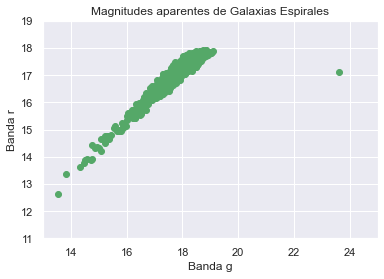

In [12]:
#Primero se grafican las galaxias Espirales 

plt.title('Magnitudes aparentes de Galaxias Espirales')
plt.xlabel('Banda g')
plt.ylabel('Banda r')
plt.ylim(11,19)
plt.xlim(13,25)
plt.plot(g_sp, r_sp, 'og')
plt.show()

In [18]:
#Para realizar el ajuste para la realación entre las magnitudes se usa una Relación Lineal

from sklearn.linear_model import LinearRegression

In [19]:
#Se puede ver la información de esta funcion 
#LinearRegression?

In [21]:
# Se definen los datos con los que se va a trabajar
x = g_sp.reshape((-1, 1))
y = r_sp

In [24]:
# El siguiente paso es crear un modelo de regresión lineal y ajustarlo utilizando los datos existentes.

model = LinearRegression().fit(x, y)

In [41]:
# Se aplica el modelo y se obtienen los valores de a y b, teniendo en cuenta y = a*x + b

b= model.intercept_
a = model.coef_[0] 

print('b:', model.intercept_)

print('a:', model.coef_)


b: -0.7595625987108852
a: [0.99992319]


In [42]:
#Para pode graficar el ajuste se define una función que use los valores a y b obtenidos

def ajustelin(a, b, x):
   
       return   a * x + b 

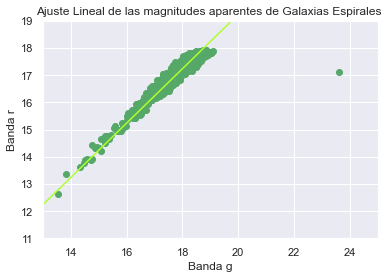

In [48]:
# Se grafican las magnitudes con el ajuste realizado. 

plt.title('Ajuste Lineal de las magnitudes aparentes de Galaxias Espirales ')
plt.xlabel('Banda g')
plt.ylabel('Banda r')
plt.ylim(11,19)
plt.xlim(13,25)
plt.plot(g_sp, r_sp, 'og')
x = range(13,25)
plt.plot(x, [ajustelin(a,b,i)for  i in x], label = 'Ajuste Lineal', color = 'greenyellow')

plt.show()

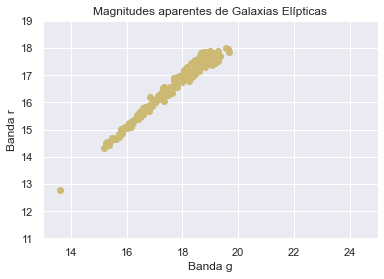

In [51]:
# Realizamos el mismo procedimiento para las galaxias Elípticas

plt.title('Magnitudes aparentes de Galaxias Elípticas')
plt.xlabel('Banda g')
plt.ylabel('Banda r')
plt.ylim(11,19)
plt.xlim(13,25)
plt.plot(g_eli, r_eli, 'oy')
plt.show()


In [54]:
# Se definen los datos con los que se va a trabajar
xe = g_eli.reshape((-1, 1))
ye = r_eli
model2 = LinearRegression().fit(xe, ye)

In [55]:
# Se aplica el modelo y se obtienen los valores de a y b, teniendo en cuenta y = a*x + b

b2= model2.intercept_
a2 = model2.coef_[0] 

print('b:', model2.intercept_)

print('a:', model2.coef_)

b: -1.0869957444892506
a: [0.99989091]


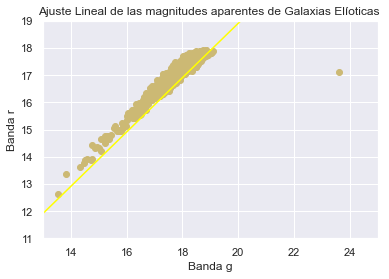

In [56]:
# Se grafican las magnitudes con el ajuste realizado. 

plt.title('Ajuste Lineal de las magnitudes aparentes de Galaxias Elíoticas ')
plt.xlabel('Banda g')
plt.ylabel('Banda r')
plt.ylim(11,19)
plt.xlim(13,25)
plt.plot(g_sp, r_sp, 'oy')
x = range(13,25)
plt.plot(x, [ajustelin(a2,b2,i)for  i in x], label = 'Ajuste Lineal', color = 'yellow')

plt.show()